<a href="https://colab.research.google.com/github/veranoviani/Final-Project/blob/main/Customer_Segmentation_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install dan Load Packages

In [ ]:
!pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.spatial import ConvexHull

from datetime import datetime

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

In [ ]:
 df = pd.read_csv("Supermart Grocery Sales.csv")

In [ ]:
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


In [ ]:
df["Order Date"] = pd.to_datetime(df['Order Date'])

In [ ]:
df['year']=df["Order Date"].dt.year
df

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,year
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-11-08,North,1254,0.12,401.28,Tamil Nadu,2017
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-11-08,South,749,0.18,149.80,Tamil Nadu,2017
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-06-12,West,2360,0.21,165.20,Tamil Nadu,2017
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-10-11,South,896,0.25,89.60,Tamil Nadu,2016
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-10-11,South,2355,0.26,918.45,Tamil Nadu,2016
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,2015-12-24,West,945,0.16,359.10,Tamil Nadu,2015
9990,OD9991,Alan,Bakery,Biscuits,Kanyakumari,2015-07-12,West,1195,0.26,71.70,Tamil Nadu,2015
9991,OD9992,Ravi,Food Grains,Rice,Bodi,2017-06-06,West,1567,0.16,501.44,Tamil Nadu,2017
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,2018-10-16,West,1659,0.15,597.24,Tamil Nadu,2018


# SEGMENTATION TAHUN 2015

In [ ]:
raw_data = df.query('year == 2015')

In [ ]:
raw_data

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,year
5,OD6,Adavan,Food Grains,Organic Staples,Dharmapuri,2015-06-09,West,2305,0.26,322.70,Tamil Nadu,2015
6,OD7,Jonas,Fruits & Veggies,Fresh Vegetables,Trichy,2015-06-09,West,826,0.33,346.92,Tamil Nadu,2015
7,OD8,Hafiz,Fruits & Veggies,Fresh Fruits,Ramanadhapuram,2015-06-09,West,1847,0.32,147.76,Tamil Nadu,2015
8,OD9,Hafiz,Bakery,Biscuits,Tirunelveli,2015-06-09,West,791,0.23,181.93,Tamil Nadu,2015
9,OD10,Krithika,Bakery,Cakes,Chennai,2015-06-09,West,1795,0.27,484.65,Tamil Nadu,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
9979,OD9980,Verma,Bakery,Cakes,Madurai,2015-03-18,West,1418,0.31,567.20,Tamil Nadu,2015
9981,OD9982,Suresh,Fruits & Veggies,Fresh Vegetables,Tirunelveli,2015-08-09,West,1694,0.15,694.54,Tamil Nadu,2015
9987,OD9988,Ganesh,Fruits & Veggies,Fresh Vegetables,Theni,2015-10-19,West,1350,0.15,67.50,Tamil Nadu,2015
9989,OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,2015-12-24,West,945,0.16,359.10,Tamil Nadu,2015


In [ ]:
raw_data["Order Date"] = pd.to_datetime(df['Order Date'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
raw_data['GMV'] = raw_data['Sales'] - (raw_data['Discount']*raw_data['Sales'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
raw_data['Order Date'].max()

Timestamp('2015-12-31 00:00:00')

In [ ]:
analysis_date = raw_data['Order Date'].max()

In [ ]:
data_for_model = raw_data.groupby(['Customer Name'], as_index=False).agg({
        'Order Date': lambda x: (analysis_date - x.max()).days,
        'Order ID': 'count',
        'GMV': 'sum'})

In [ ]:
data_for_model.rename(columns={'Order Date': 'Recency',
                         'Order ID': 'Frequency',
                         'TotalSum': 'MonetaryValue'}, inplace=True)

In [ ]:
data_for_model = data_for_model[data_for_model['GMV'] > 0]

In [ ]:
data_for_model

,Customer Name,Recency,Frequency,GMV
0,Adavan,2,42,49969.63
1,Aditi,5,37,47967.87
2,Akash,2,35,37747.57
3,Alan,11,47,54511.42
4,Amrish,11,51,53239.85
5,Amy,5,37,43343.55
6,Anu,7,31,39573.45
7,Arutra,2,48,54714.07
8,Arvind,7,50,53062.35
9,Esther,4,36,46209.86


In [ ]:
r_labels = range(4, 0, -1)
f_labels = range(1, 5)
m_labels = range(1, 5)

r_groups = pd.qcut(data_for_model['Recency'], q=4, labels = r_labels)
f_groups = pd.qcut(data_for_model['Frequency'], q=4, labels = f_labels)
m_groups = pd.qcut(data_for_model['GMV'], q=4, labels = m_labels)

In [ ]:
data_for_model = data_for_model.assign(R = r_groups.values, F = f_groups.values, M = m_groups.values)

In [ ]:
data_for_model['rfm_score'] = data_for_model[['R','F','M']].apply(
    lambda x: ''.join(x.astype(str)),
    axis=1
)

In [ ]:
data_for_model['rfm_score'] = data_for_model['rfm_score'].astype('int')

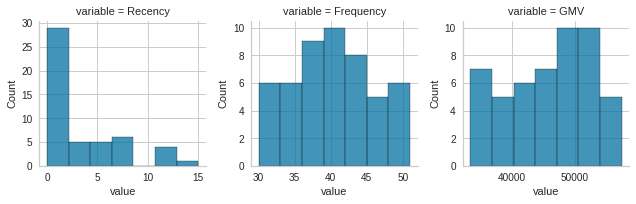

In [ ]:
g = sns.FacetGrid(
    data = pd.melt(
     data_for_model[["Recency", "Frequency","GMV"]],
     value_vars=["Recency","Frequency", "GMV"]
    ),
    col = "variable",
    sharex = False,
    sharey = False
)
g.map(sns.histplot, "value");

Jika dilihat pada tahun 2015 bahwa distribusi recency nya sangat bagus dimana customer sering sekali kembali ke tempat tersebut. 

Lalu distribusi frequency nya juga tinggi dimana jumlah purchase nya termasuk tinggi. Ditambah GMV penjualan yang tinggi sekitar

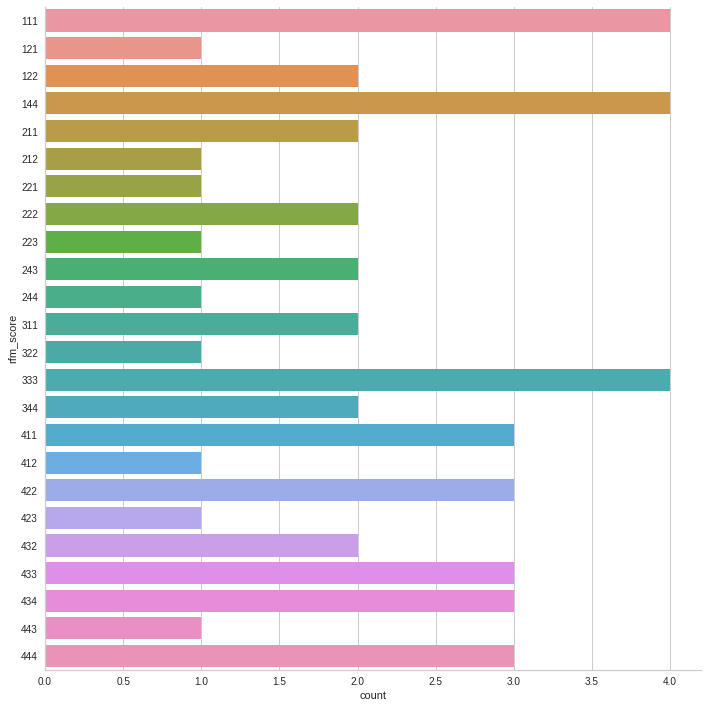

In [ ]:
sns.catplot(
    y = "rfm_score", 
    data = data_for_model.sort_values(by = ["rfm_score"], axis = 0), 
    kind = "count", 
    height = 10
)

In [ ]:
data_for_model['rfm_segment'] = np.select(
    [
     data_for_model['rfm_score'].isin([444,333, 334, 343, 344, 433, 434, 443]),
     data_for_model['rfm_score'].isin([321, 322, 323, 324, 331, 332, 341, 342, 412, 413, 414, 421, 422, 423, 424, 431, 432, 441, 442]),
     data_for_model['rfm_score'].isin([411]),
     data_for_model['rfm_score'].isin([221, 222, 223, 224, 231, 232, 241, 242, 311, 312, 313, 314]),
     data_for_model['rfm_score'].isin([133, 134, 143, 144, 233, 234, 243, 244]),
     data_for_model['rfm_score'].isin([112, 111, 113, 114, 121, 122, 123, 124, 131, 132, 141, 142, 211, 212, 213, 214]),
    ],
    [
     'Loyal Customer',
     'Promising',
     'Recent Customers',
     'Customer Needing Attention',
     "Can't Lose Them",
     "At Risk",
    ]
)

In [ ]:
data_for_model

,Customer Name,Recency,Frequency,GMV,R,F,M,rfm_score,rfm_segment
0,Adavan,2,42,49969.63,3,3,3,333,Loyal Customer
1,Aditi,5,37,47967.87,2,2,3,223,Customer Needing Attention
2,Akash,2,35,37747.57,3,1,1,311,Customer Needing Attention
3,Alan,11,47,54511.42,1,4,4,144,Can't Lose Them
4,Amrish,11,51,53239.85,1,4,4,144,Can't Lose Them
5,Amy,5,37,43343.55,2,2,2,222,Customer Needing Attention
6,Anu,7,31,39573.45,1,1,1,111,At Risk
7,Arutra,2,48,54714.07,3,4,4,344,Loyal Customer
8,Arvind,7,50,53062.35,1,4,4,144,Can't Lose Them
9,Esther,4,36,46209.86,2,1,2,212,At Risk


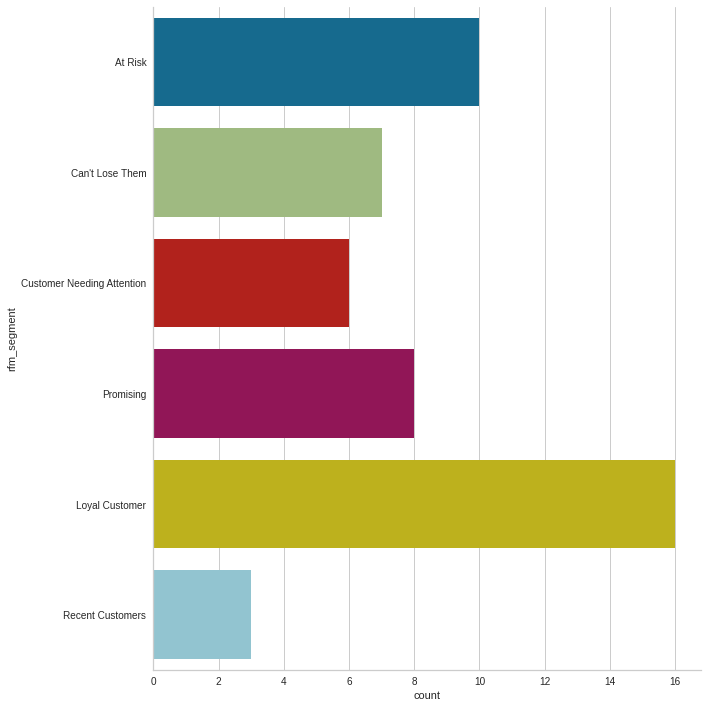

In [ ]:
sns.catplot(
    y = "rfm_segment", 
    data = data_for_model.sort_values(by = ["rfm_score"], axis = 0), 
    kind = "count", 
    height = 10
);

Dilihat pada tahun 2015 bahwa segmentasi yang terbentuk ialah Loyal customer dimana customer berani membeli barang tersebut dengan mengelurakan biaya yang tinggi dan quantity yang besar

# SEGMENTATION TAHUN 2016

In [ ]:
raw_data2 = df.query('year == 2016')

In [ ]:
raw_data2

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,year
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-10-11,South,896,0.25,89.60,Tamil Nadu,2016
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-10-11,South,2355,0.26,918.45,Tamil Nadu,2016
14,OD15,Sundar,"Eggs, Meat & Fish",Chicken,Kanyakumari,2016-11-22,Central,831,0.22,207.75,Tamil Nadu,2016
15,OD16,Ramesh,Oil & Masala,Edible Oil & Ghee,Krishnagiri,2016-11-22,Central,1440,0.11,100.80,Tamil Nadu,2016
24,OD25,Sharon,"Eggs, Meat & Fish",Eggs,Ooty,2016-09-25,West,1100,0.11,495.00,Tamil Nadu,2016
...,...,...,...,...,...,...,...,...,...,...,...,...
9950,OD9951,Aditi,Fruits & Veggies,Organic Fruits,Ramanadhapuram,2016-11-27,West,814,0.35,252.34,Tamil Nadu,2016
9978,OD9979,Roshan,Snacks,Cookies,Cumbum,2016-03-19,West,1195,0.16,250.95,Tamil Nadu,2016
9984,OD9985,Willams,Oil & Masala,Masalas,Trichy,2016-08-31,West,727,0.17,109.05,Tamil Nadu,2016
9985,OD9986,Shree,"Eggs, Meat & Fish",Mutton,Kanyakumari,2016-11-13,West,1286,0.30,475.82,Tamil Nadu,2016


In [ ]:
raw_data2['GMV'] = raw_data2['Sales'] - (raw_data2['Discount']*raw_data2['Sales'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
raw_data2['GMV']

3        672.00
4       1742.70
14       648.18
15      1281.60
24       979.00
         ...   
9950     529.10
9978    1003.80
9984     603.41
9985     900.20
9988    1241.00
Name: GMV, Length: 2102, dtype: float64

In [ ]:
raw_data2['Order Date'].max()

Timestamp('2016-12-31 00:00:00')

In [ ]:
analysis_date2 = raw_data2['Order Date'].max()

In [ ]:
data_for_model2 = raw_data2.groupby(['Customer Name'], as_index=False).agg({
        'Order Date': lambda x: (analysis_date2 - x.max()).days,
        'Order ID': 'count', 'GMV': 'sum'})

In [ ]:
data_for_model2.rename(columns={'Order Date': 'Recency',
                         'Order ID': 'Frequency',
                         'TotalSum': 'MonetaryValue'}, inplace=True)

In [ ]:
data_for_model = data_for_model2[data_for_model2['GMV'] > 0]

In [ ]:
data_for_model

,Customer Name,Recency,Frequency,GMV
0,Adavan,25,34,33908.66
1,Aditi,10,42,52716.27
2,Akash,6,38,44198.71
3,Alan,0,43,48115.88
4,Amrish,0,52,64444.25
5,Amy,4,30,32568.26
6,Anu,20,41,47033.34
7,Arutra,6,47,52903.45
8,Arvind,7,41,42421.58
9,Esther,4,49,54440.55


In [ ]:
r_labels = range(4, 0, -1)
f_labels = range(1, 5)
m_labels = range(1, 5)

r_groups = pd.qcut(data_for_model2['Recency'], q=4, labels = r_labels)
f_groups = pd.qcut(data_for_model2['Frequency'], q=4, labels = f_labels)
m_groups = pd.qcut(data_for_model2['GMV'], q=4, labels = m_labels)

In [ ]:
data_for_model = data_for_model2.assign(R = r_groups.values, F = f_groups.values, M = m_groups.values)

In [ ]:
data_for_model['rfm_score'] = data_for_model[['R','F','M']].apply(
    lambda x: ''.join(x.astype(str)),
    axis=1
)

In [ ]:
data_for_model['rfm_score'] = data_for_model['rfm_score'].astype('int')

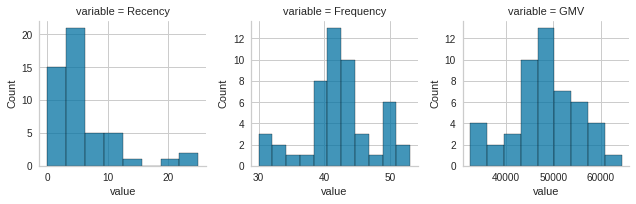

In [ ]:
g = sns.FacetGrid(
    data = pd.melt(
     data_for_model[["Recency", "Frequency","GMV"]],
     value_vars=["Recency","Frequency", "GMV"]
    ),
    col = "variable",
    sharex = False,
    sharey = False
)
g.map(sns.histplot, "value");

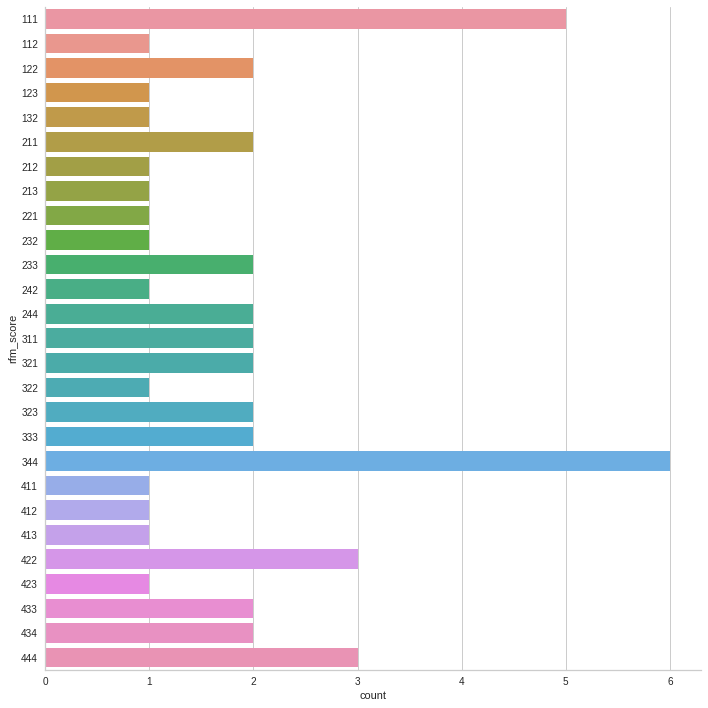

In [ ]:
sns.catplot(
    y = "rfm_score", 
    data = data_for_model.sort_values(by = ["rfm_score"], axis = 0), 
    kind = "count", 
    height = 10
)

In [ ]:
data_for_model['rfm_segment'] = np.select(
    [
     data_for_model['rfm_score'].isin([444,333, 334, 343, 344, 433, 434, 443]),
     data_for_model['rfm_score'].isin([321, 322, 323, 324, 331, 332, 341, 342, 412, 413, 414, 421, 422, 423, 424, 431, 432, 441, 442]),
     data_for_model['rfm_score'].isin([411]),
     data_for_model['rfm_score'].isin([221, 222, 223, 224, 231, 232, 241, 242, 311, 312, 313, 314]),
     data_for_model['rfm_score'].isin([133, 134, 143, 144, 233, 234, 243, 244]),
     data_for_model['rfm_score'].isin([112, 111, 113, 114, 121, 122, 123, 124, 131, 132, 141, 142, 211, 212, 213, 214]),
    ],
    [
     'Loyal Customer',
     'Promising',
     'Recent Customers',
     'Customer Needing Attention',
     "Can't Lose Them",
     "At Risk",
    ]
)

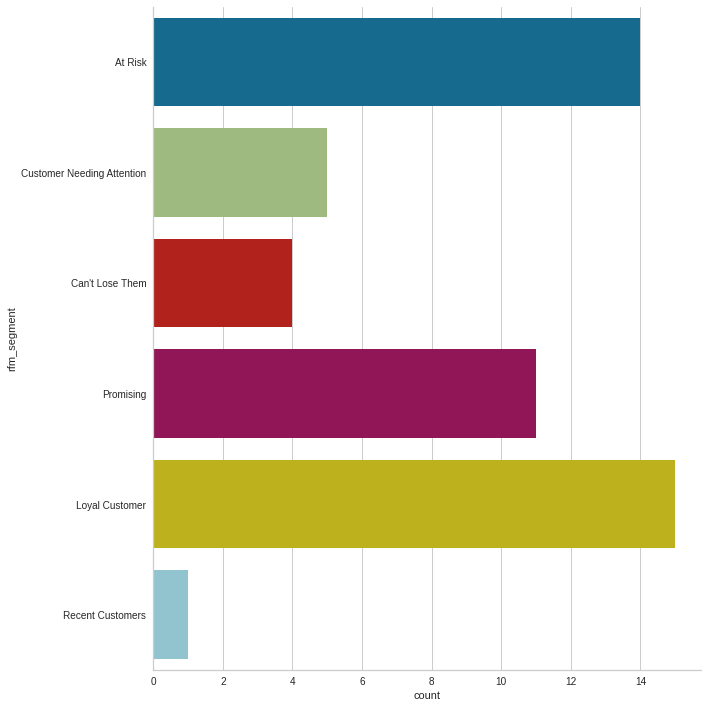

In [ ]:
sns.catplot(
    y = "rfm_segment", 
    data = data_for_model.sort_values(by = ["rfm_score"], axis = 0), 
    kind = "count", 
    height = 10
);

# SEGMENTATION TAHUN 2017

In [ ]:
raw_data3 = df.query('year == 2017')

In [ ]:
raw_data3

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,year
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-11-08,North,1254,0.12,401.28,Tamil Nadu,2017
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-11-08,South,749,0.18,149.80,Tamil Nadu,2017
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-06-12,West,2360,0.21,165.20,Tamil Nadu,2017
13,OD14,Peer,Fruits & Veggies,Fresh Vegetables,Kanyakumari,2017-12-05,West,1277,0.25,63.85,Tamil Nadu,2017
21,OD22,Alan,Food Grains,Dals & Pulses,Karur,2017-12-09,Central,948,0.13,47.40,Tamil Nadu,2017
...,...,...,...,...,...,...,...,...,...,...,...,...
9970,OD9971,Vidya,Oil & Masala,Masalas,Tirunelveli,2017-09-17,West,2132,0.31,383.76,Tamil Nadu,2017
9973,OD9974,Surya,Snacks,Cookies,Karur,2017-05-05,West,2377,0.14,237.70,Tamil Nadu,2017
9976,OD9977,Shah,Oil & Masala,Masalas,Salem,2017-06-06,West,2126,0.13,382.68,Tamil Nadu,2017
9983,OD9984,Peer,Food Grains,Rice,Nagercoil,2017-12-06,West,2335,0.17,607.10,Tamil Nadu,2017


In [ ]:
raw_data3['GMV'] = raw_data3['Sales'] - (raw_data3['Discount']*raw_data3['Sales'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
raw_data3['GMV']

0       1103.52
1        614.18
2       1864.40
13       957.75
21       824.76
         ...   
9970    1471.08
9973    2044.22
9976    1849.62
9983    1938.05
9991    1316.28
Name: GMV, Length: 2587, dtype: float64

In [ ]:
analysis_date = raw_data3['Order Date'].max()

In [ ]:
data_for_model4 = raw_data3.groupby(['Customer Name'], as_index=False).agg({
        'Order Date': lambda x: (analysis_date - x.max()).days,
        'Order ID': 'count', 
        'GMV': 'sum'})

In [ ]:
data_for_model4.rename(columns={'Order Date': 'Recency',
                         'Order ID': 'Frequency',
                         'TotalSum': 'MonetaryValue'}, inplace=True)

In [ ]:
data_for_model = data_for_model4[data_for_model['GMV'] > 0]

In [ ]:
data_for_model

,Customer Name,Recency,Frequency,GMV
0,Adavan,5,50,66715.36
1,Aditi,16,44,55812.57
2,Akash,21,51,64313.17
3,Alan,6,47,54002.19
4,Amrish,17,59,65700.63
5,Amy,0,59,72755.07
6,Anu,2,44,50660.33
7,Arutra,0,60,74530.77
8,Arvind,6,46,52955.66
9,Esther,7,41,43843.49


In [ ]:
r_labels = range(4, 0, -1)
f_labels = range(1, 5)
m_labels = range(1, 5)

r_groups = pd.qcut(data_for_model['Recency'], q=4, labels = r_labels)
f_groups = pd.qcut(data_for_model['Frequency'], q=4, labels = f_labels)
m_groups = pd.qcut(data_for_model['GMV'], q=4, labels = m_labels)

In [ ]:
data_for_model = data_for_model.assign(R = r_groups.values, F = f_groups.values, M = m_groups.values)

In [ ]:
data_for_model['rfm_score'] = data_for_model[['R','F','M']].apply(
    lambda x: ''.join(x.astype(str)),
    axis=1
)

In [ ]:
data_for_model['rfm_score'] = data_for_model['rfm_score'].astype('int')

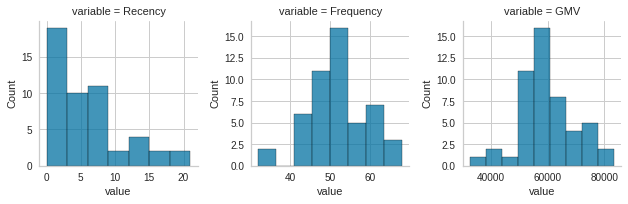

In [ ]:
g = sns.FacetGrid(
    data = pd.melt(
     data_for_model[["Recency", "Frequency","GMV"]],
     value_vars=["Recency","Frequency", "GMV"]
    ),
    col = "variable",
    sharex = False,
    sharey = False
)
g.map(sns.histplot, "value");

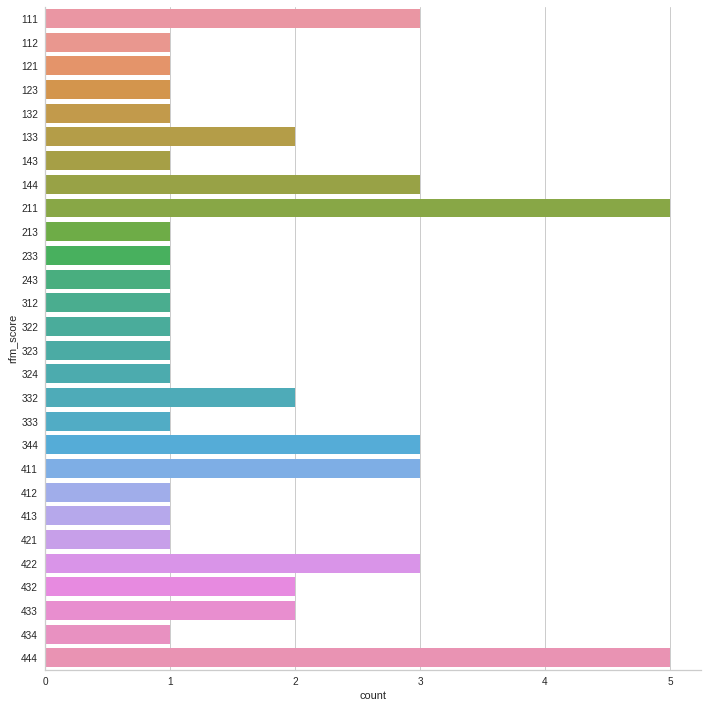

In [ ]:
sns.catplot(
    y = "rfm_score", 
    data = data_for_model.sort_values(by = ["rfm_score"], axis = 0), 
    kind = "count", 
    height = 10
)

In [ ]:
data_for_model['rfm_segment'] = np.select(
    [
     data_for_model['rfm_score'].isin([444,333, 334, 343, 344, 433, 434, 443]),
     data_for_model['rfm_score'].isin([321, 322, 323, 324, 331, 332, 341, 342, 412, 413, 414, 421, 422, 423, 424, 431, 432, 441, 442]),
     data_for_model['rfm_score'].isin([411]),
     data_for_model['rfm_score'].isin([221, 222, 223, 224, 231, 232, 241, 242, 311, 312, 313, 314]),
     data_for_model['rfm_score'].isin([133, 134, 143, 144, 233, 234, 243, 244]),
     data_for_model['rfm_score'].isin([112, 111, 113, 114, 121, 122, 123, 124, 131, 132, 141, 142, 211, 212, 213, 214]),
    ],
    [
     'Loyal Customer',
     'Promising',
     'Recent Customers',
     'Customer Needing Attention',
     "Can't Lose Them",
     "At Risk",
    ]
)

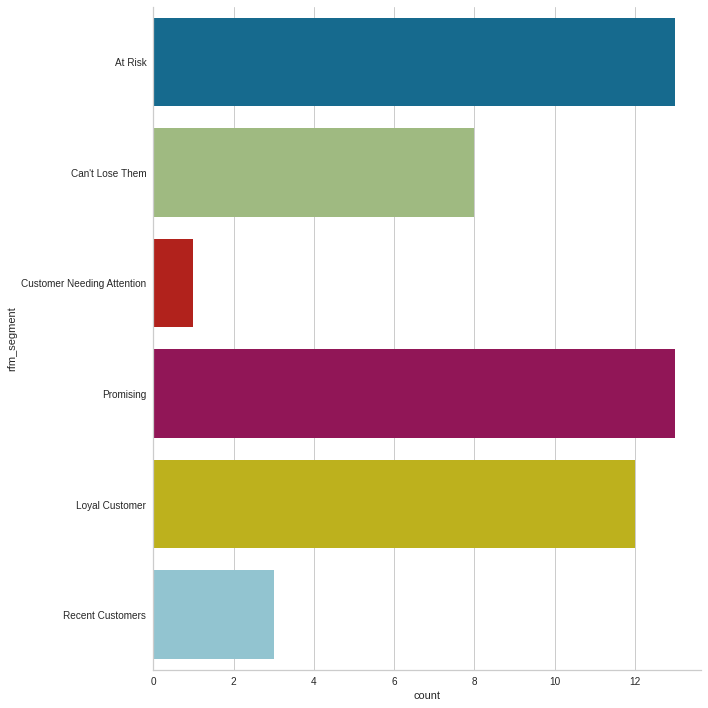

In [ ]:
sns.catplot(
    y = "rfm_segment", 
    data = data_for_model.sort_values(by = ["rfm_score"], axis = 0), 
    kind = "count", 
    height = 10
);

# SEGMENTATION TAHUN 2018

In [ ]:
raw_data4 = df.query('year == 2018')

In [ ]:
raw_data4

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,year
12,OD13,Sharon,Snacks,Cookies,Dindigul,2018-04-15,South,1659,0.19,315.21,Tamil Nadu,2018
23,OD24,Alan,Fruits & Veggies,Organic Vegetables,Tenkasi,2018-07-16,East,969,0.29,77.52,Tamil Nadu,2018
34,OD35,Anu,Beverages,Health Drinks,Vellore,2018-10-19,Central,809,0.32,80.90,Tamil Nadu,2018
41,OD42,Arutra,Beverages,Soft Drinks,Salem,2018-09-10,Central,1868,0.18,616.44,Tamil Nadu,2018
43,OD44,Mathew,Snacks,Cookies,Dharmapuri,2018-09-19,South,2311,0.20,1039.95,Tamil Nadu,2018
...,...,...,...,...,...,...,...,...,...,...,...,...
9980,OD9981,Willams,Food Grains,Dals & Pulses,Vellore,2018-08-31,West,1251,0.29,387.81,Tamil Nadu,2018
9982,OD9983,Veronica,Fruits & Veggies,Organic Vegetables,Tenkasi,2018-08-28,West,1309,0.33,183.26,Tamil Nadu,2018
9986,OD9987,Peer,Bakery,Biscuits,Vellore,2018-05-08,West,2199,0.34,153.93,Tamil Nadu,2018
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,2018-10-16,West,1659,0.15,597.24,Tamil Nadu,2018


In [ ]:
raw_data4['GMV'] = raw_data4['Sales'] - (raw_data4['Discount']*raw_data4['Sales'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
raw_data4['GMV']

12      1343.79
23       687.99
34       550.12
41      1531.76
43      1848.80
         ...   
9980     888.21
9982     877.03
9986    1451.34
9992    1410.15
9993     744.48
Name: GMV, Length: 3312, dtype: float64

In [ ]:
analysis_date4 = raw_data4['Order Date'].max()

In [ ]:
data_for_model4 = raw_data4.groupby(['Customer Name'], as_index=False).agg({
        'Order Date': lambda x: (analysis_date4 - x.max()).days,
        'Order ID': 'count', 
        'GMV': 'sum'})

In [ ]:
data_for_model4.rename(columns={'Order Date': 'Recency',
                         'Order ID': 'Frequency',
                         'TotalSum': 'MonetaryValue'}, inplace=True)

In [ ]:
data_for_model4 = data_for_model4[data_for_model4['GMV'] > 0]

In [ ]:
data_for_model4

,Customer Name,Recency,Frequency,GMV
0,Adavan,7,79,93917.46
1,Aditi,1,64,76144.44
2,Akash,2,72,91678.05
3,Alan,6,61,69694.17
4,Amrish,3,65,73839.16
5,Amy,2,70,83528.48
6,Anu,0,70,82856.78
7,Arutra,4,63,71189.60
8,Arvind,0,66,79172.08
9,Esther,2,63,73219.30


In [ ]:
r_labels = range(4, 0, -1)
f_labels = range(1, 5)
m_labels = range(1, 5)

r_groups = pd.qcut(data_for_model4['Recency'], q=4, labels = r_labels)
f_groups = pd.qcut(data_for_model4['Frequency'], q=4, labels = f_labels)
m_groups = pd.qcut(data_for_model4['GMV'], q=4, labels = m_labels)

In [ ]:
data_for_model = data_for_model4.assign(R = r_groups.values, F = f_groups.values, M = m_groups.values)

In [ ]:
data_for_model['rfm_score'] = data_for_model[['R','F','M']].apply(
    lambda x: ''.join(x.astype(str)),
    axis=1
)

In [ ]:
data_for_model['rfm_score'] = data_for_model['rfm_score'].astype('int')

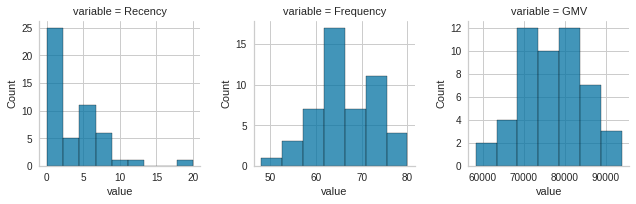

In [ ]:
g = sns.FacetGrid(
    data = pd.melt(
     data_for_model[["Recency", "Frequency","GMV"]],
     value_vars=["Recency","Frequency", "GMV"]
    ),
    col = "variable",
    sharex = False,
    sharey = False
)
g.map(sns.histplot, "value");

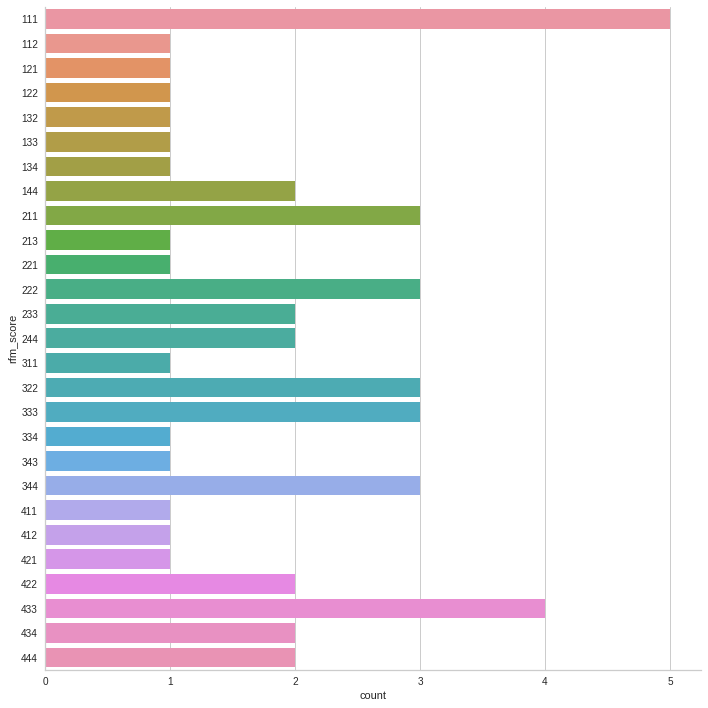

In [ ]:
sns.catplot(
    y = "rfm_score", 
    data = data_for_model.sort_values(by = ["rfm_score"], axis = 0), 
    kind = "count", 
    height = 10
)

In [ ]:
data_for_model['rfm_segment'] = np.select(
    [
     data_for_model['rfm_score'].isin([444,333, 334, 343, 344, 433, 434, 443]),
     data_for_model['rfm_score'].isin([321, 322, 323, 324, 331, 332, 341, 342, 412, 413, 414, 421, 422, 423, 424, 431, 432, 441, 442]),
     data_for_model['rfm_score'].isin([411]),
     data_for_model['rfm_score'].isin([221, 222, 223, 224, 231, 232, 241, 242, 311, 312, 313, 314]),
     data_for_model['rfm_score'].isin([133, 134, 143, 144, 233, 234, 243, 244]),
     data_for_model['rfm_score'].isin([112, 111, 113, 114, 121, 122, 123, 124, 131, 132, 141, 142, 211, 212, 213, 214]),
    ],
    [
     'Loyal Customer',
     'Promising',
     'Recent Customers',
     'Customer Needing Attention',
     "Can't Lose Them",
     "At Risk",
    ]
)

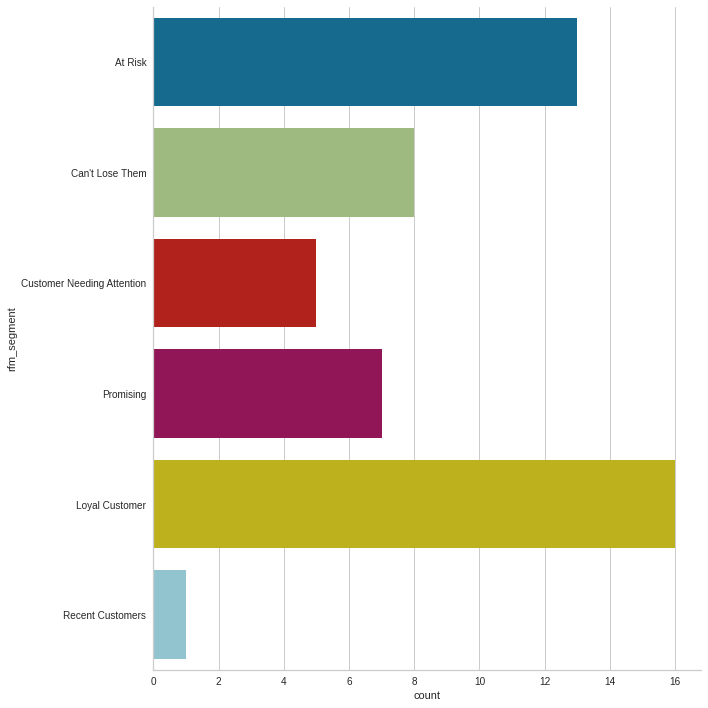

In [ ]:
sns.catplot(
    y = "rfm_segment", 
    data = data_for_model.sort_values(by = ["rfm_score"], axis = 0), 
    kind = "count", 
    height = 10
);

# SEGMENTATION KESELURUHAN DARI TAHUN 2015-2018

In [ ]:
df['GMV'] = df['Sales'] - (df['Discount']*df['Sales'])

In [ ]:
df["Order Date"] = pd.to_datetime(df['Order Date'])

In [ ]:
df['Order Date'].min()

Timestamp('2015-01-03 00:00:00')

In [ ]:
df['Order Date'].max()

Timestamp('2018-12-30 00:00:00')

In [ ]:
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,year,GMV
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-11-08,North,1254,0.12,401.28,Tamil Nadu,2017,1103.52
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-11-08,South,749,0.18,149.80,Tamil Nadu,2017,614.18
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-06-12,West,2360,0.21,165.20,Tamil Nadu,2017,1864.40
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-10-11,South,896,0.25,89.60,Tamil Nadu,2016,672.00
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-10-11,South,2355,0.26,918.45,Tamil Nadu,2016,1742.70


In [ ]:
analysis_date = df['Order Date'].max()

In [ ]:
data_for_model = df.groupby(['Customer Name'], as_index=False).agg({
        'Order Date': lambda x: (analysis_date - x.max()).days,
        'Order ID': 'count',
        'GMV': 'sum'})

In [ ]:
data_for_model.rename(columns={'Order Date': 'Recency',
                         'Order ID': 'Frequency',
                         'TotalSum': 'MonetaryValue'}, inplace=True)

In [ ]:
data_for_model = data_for_model[data_for_model['GMV'] > 0]

In [ ]:
data_for_model

,Customer Name,Recency,Frequency,GMV
0,Adavan,7,205,244511.11
1,Aditi,1,187,232641.15
2,Akash,2,196,237937.50
3,Alan,6,198,226323.66
4,Amrish,3,227,257223.89
5,Amy,2,196,232195.36
6,Anu,0,186,220123.90
7,Arutra,4,218,253337.89
8,Arvind,0,203,227611.67
9,Esther,2,189,217713.20


In [ ]:
r_labels = range(4, 0, -1)
f_labels = range(1, 5)
m_labels = range(1, 5)

r_groups = pd.qcut(data_for_model['Recency'], q=4, labels = r_labels)
f_groups = pd.qcut(data_for_model['Frequency'], q=4, labels = f_labels)
m_groups = pd.qcut(data_for_model['GMV'], q=4, labels = m_labels)

In [ ]:
data_for_model = data_for_model.assign(R = r_groups.values, F = f_groups.values, M = m_groups.values)

In [ ]:
data_for_model['rfm_score'] = data_for_model[['R','F','M']].apply(
    lambda x: ''.join(x.astype(str)),
    axis=1
)

In [ ]:
data_for_model['rfm_score'] = data_for_model['rfm_score'].astype('int')

In [ ]:
data_for_model.head()

,Customer Name,Recency,Frequency,GMV,R,F,M,rfm_score
0,Adavan,7,205,244511.11,1,3,4,134
1,Aditi,1,187,232641.15,4,1,3,413
2,Akash,2,196,237937.50,3,2,3,323
3,Alan,6,198,226323.66,1,2,2,122
4,Amrish,3,227,257223.89,2,4,4,244


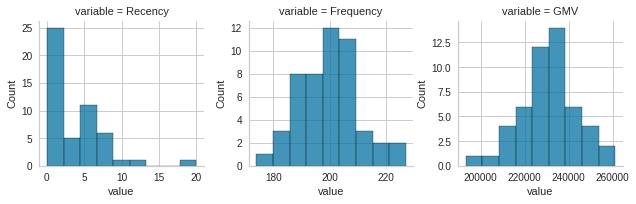

In [ ]:
g = sns.FacetGrid(
    data = pd.melt(
     data_for_model[["Recency", "Frequency","GMV"]],
     value_vars=["Recency","Frequency", "GMV"]
    ),
    col = "variable",
    sharex = False,
    sharey = False
)
g.map(sns.histplot, "value");

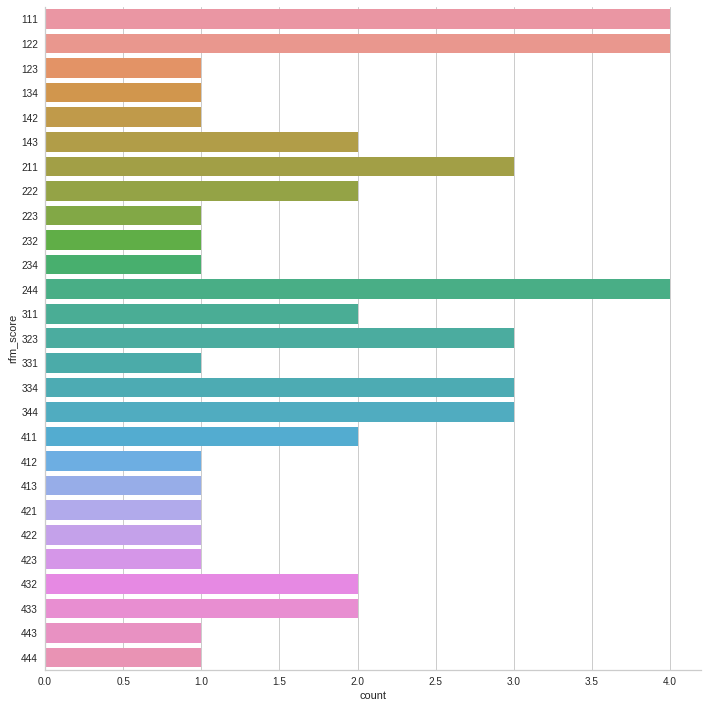

In [ ]:
sns.catplot(
    y = "rfm_score", 
    data = data_for_model.sort_values(by = ["rfm_score"], axis = 0), 
    kind = "count", 
    height = 10
)

In [ ]:
data_for_model['rfm_segment'] = np.select(
    [
     data_for_model['rfm_score'].isin([444,333, 334, 343, 344, 433, 434, 443]),
     data_for_model['rfm_score'].isin([321, 322, 323, 324, 331, 332, 341, 342, 412, 413, 414, 421, 422, 423, 424, 431, 432, 441, 442]),
     data_for_model['rfm_score'].isin([411]),
     data_for_model['rfm_score'].isin([221, 222, 223, 224, 231, 232, 241, 242, 311, 312, 313, 314]),
     data_for_model['rfm_score'].isin([133, 134, 143, 144, 233, 234, 243, 244]),
     data_for_model['rfm_score'].isin([112, 111, 113, 114, 121, 122, 123, 124, 131, 132, 141, 142, 211, 212, 213, 214]),
    ],
    [
     'Loyal Customer',
     'Promising',
     'Recent Customers',
     'Customer Needing Attention',
     "Can't Lose Them",
     "At Risk",
    ]
)

In [ ]:
data_for_model

,Customer Name,Recency,Frequency,GMV,R,F,M,rfm_score,rfm_segment
0,Adavan,7,205,244511.11,1,3,4,134,Can't Lose Them
1,Aditi,1,187,232641.15,4,1,3,413,Promising
2,Akash,2,196,237937.50,3,2,3,323,Promising
3,Alan,6,198,226323.66,1,2,2,122,At Risk
4,Amrish,3,227,257223.89,2,4,4,244,Can't Lose Them
5,Amy,2,196,232195.36,3,2,3,323,Promising
6,Anu,0,186,220123.90,4,1,1,411,Recent Customers
7,Arutra,4,218,253337.89,2,4,4,244,Can't Lose Them
8,Arvind,0,203,227611.67,4,3,2,432,Promising
9,Esther,2,189,217713.20,3,1,1,311,Customer Needing Attention


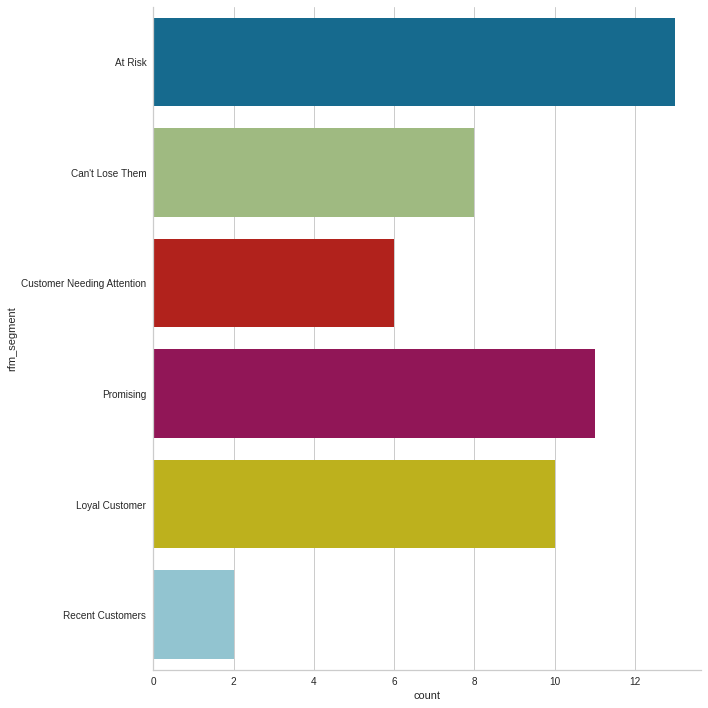

In [ ]:
sns.catplot(
    y = "rfm_segment", 
    data = data_for_model.sort_values(by = ["rfm_score"], axis = 0), 
    kind = "count", 
    height = 10
);

In [ ]:
df2 = pd.merge(df,data_for_model,how='left',on='Customer Name')

In [ ]:
df2

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,...,year,GMV_x,Recency,Frequency,GMV_y,R,F,M,rfm_score,rfm_segment
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-11-08,North,1254,0.12,401.28,...,2017,1103.52,7,208,228572.24,1,4,2,142,At Risk
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-11-08,South,749,0.18,149.80,...,2017,614.18,9,189,210152.19,1,1,1,111,At Risk
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-06-12,West,2360,0.21,165.20,...,2017,1864.40,0,208,235851.45,4,4,3,443,Loyal Customer
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-10-11,South,896,0.25,89.60,...,2016,672.00,6,182,212889.14,1,1,1,111,At Risk
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-10-11,South,2355,0.26,918.45,...,2016,1742.70,2,204,241793.62,3,3,4,334,Loyal Customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,2015-12-24,West,945,0.16,359.10,...,2015,793.80,6,207,238040.48,1,4,3,143,Can't Lose Them
9990,OD9991,Alan,Bakery,Biscuits,Kanyakumari,2015-07-12,West,1195,0.26,71.70,...,2015,884.30,6,198,226323.66,1,2,2,122,At Risk
9991,OD9992,Ravi,Food Grains,Rice,Bodi,2017-06-06,West,1567,0.16,501.44,...,2017,1316.28,8,200,236627.17,1,2,3,123,At Risk
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,2018-10-16,West,1659,0.15,597.24,...,2018,1410.15,2,204,239302.35,3,3,4,334,Loyal Customer


In [ ]:
pd.crosstab(df2["rfm_segment"],df2["Category"]).apply(lambda x: x/x.sum(),axis=1)

Category,Bakery,Beverages,"Eggs, Meat & Fish",Food Grains,Fruits & Veggies,Oil & Masala,Snacks
rfm_segment,,,,,,,
At Risk,0.153232,0.132083,0.155227,0.138069,0.132482,0.133280,0.155626
Can't Lose Them,0.141760,0.128175,0.147076,0.147076,0.147076,0.137035,0.151802
Customer Needing Attention,0.130397,0.155440,0.159758,0.129534,0.145941,0.120035,0.158895
Loyal Customer,0.131328,0.144699,0.146609,0.142789,0.154728,0.134193,0.145654
Promising,0.149309,0.143779,0.137327,0.141014,0.138710,0.146544,0.143318
Recent Customers,0.104558,0.152815,0.166220,0.128686,0.115282,0.152815,0.179625


<Figure size 2000x2000 with 0 Axes>

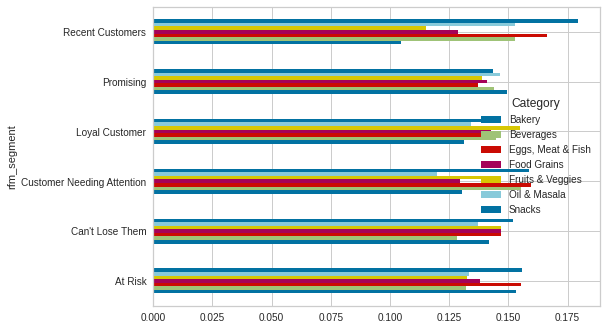

In [ ]:
plt.figure(figsize=(20,20),dpi=100)
pd.crosstab(df2["rfm_segment"],df2["Category"]).apply(lambda x: x/x.sum(),axis=1).plot(kind="barh")

In [ ]:
df2['year']=df2["Order Date"].dt.year
df2

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,...,year,GMV_x,Recency,Frequency,GMV_y,R,F,M,rfm_score,rfm_segment
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-11-08,North,1254,0.12,401.28,...,2017,1103.52,7,208,228572.24,1,4,2,142,At Risk
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-11-08,South,749,0.18,149.80,...,2017,614.18,9,189,210152.19,1,1,1,111,At Risk
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-06-12,West,2360,0.21,165.20,...,2017,1864.40,0,208,235851.45,4,4,3,443,Loyal Customer
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-10-11,South,896,0.25,89.60,...,2016,672.00,6,182,212889.14,1,1,1,111,At Risk
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-10-11,South,2355,0.26,918.45,...,2016,1742.70,2,204,241793.62,3,3,4,334,Loyal Customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,2015-12-24,West,945,0.16,359.10,...,2015,793.80,6,207,238040.48,1,4,3,143,Can't Lose Them
9990,OD9991,Alan,Bakery,Biscuits,Kanyakumari,2015-07-12,West,1195,0.26,71.70,...,2015,884.30,6,198,226323.66,1,2,2,122,At Risk
9991,OD9992,Ravi,Food Grains,Rice,Bodi,2017-06-06,West,1567,0.16,501.44,...,2017,1316.28,8,200,236627.17,1,2,3,123,At Risk
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,2018-10-16,West,1659,0.15,597.24,...,2018,1410.15,2,204,239302.35,3,3,4,334,Loyal Customer


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 0 to 9993
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   object        
 1   Customer Name  9994 non-null   object        
 2   Category       9994 non-null   object        
 3   Sub Category   9994 non-null   object        
 4   City           9994 non-null   object        
 5   Order Date     9994 non-null   datetime64[ns]
 6   Region         9994 non-null   object        
 7   Sales          9994 non-null   int64         
 8   Discount       9994 non-null   float64       
 9   Profit         9994 non-null   float64       
 10  State          9994 non-null   object        
 11  year           9994 non-null   int64         
 12  GMV_x          9994 non-null   float64       
 13  Recency        9994 non-null   int64         
 14  Frequency      9994 non-null   int64         
 15  GMV_y          9994 n

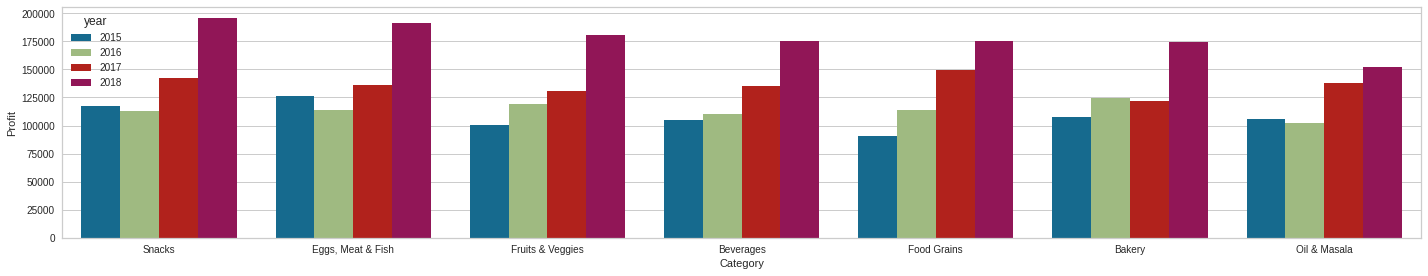

In [ ]:
group_df = df2.groupby(["Category","year"]).sum().sort_values("Profit",ascending=False).reset_index()

plt.subplots(figsize=(20,4))
sns.barplot(data=group_df,x="Category",y='Profit', hue="year")

plt.tight_layout()
plt.show()

In [ ]:
df2.groupby(["year","Category"])["rfm_segment"].count()

year  Category         
2015  Bakery               293
      Beverages            274
      Eggs, Meat & Fish    314
      Food Grains          248
      Fruits & Veggies     277
      Oil & Masala         280
      Snacks               307
2016  Bakery               316
      Beverages            295
      Eggs, Meat & Fish    306
      Food Grains          285
      Fruits & Veggies     313
      Oil & Masala         282
      Snacks               305
2017  Bakery               341
      Beverages            369
      Eggs, Meat & Fish    372
      Food Grains          395
      Fruits & Veggies     355
      Oil & Masala         362
      Snacks               393
2018  Bakery               463
      Beverages            462
      Eggs, Meat & Fish    498
      Food Grains          470
      Fruits & Veggies     473
      Oil & Masala         437
      Snacks               509
Name: rfm_segment, dtype: int64

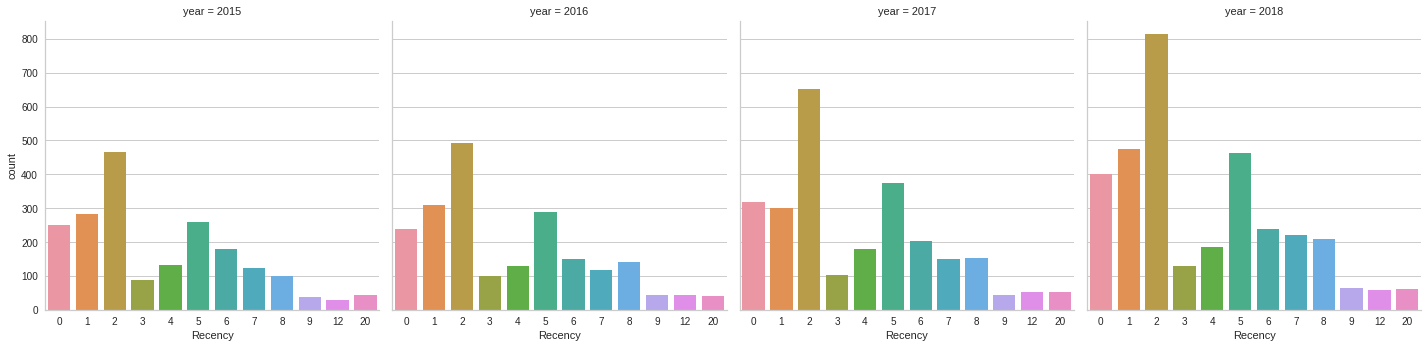

In [ ]:
sns.catplot(data=df2,col="year",x="Recency",kind="count")

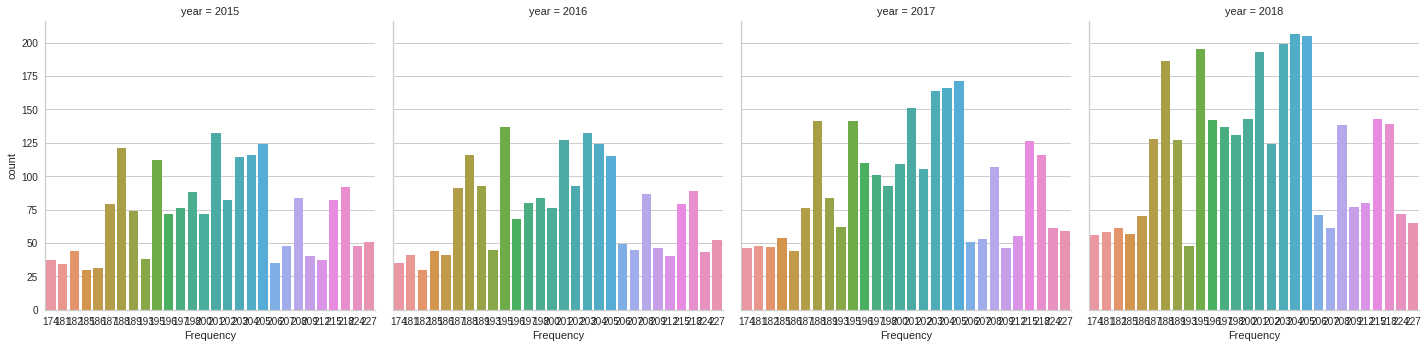

In [ ]:
sns.catplot(data=df2,col="year",x="Frequency",kind="count")

# CUSTOMER LIFETIME VALUE

In [ ]:
# Rank each metric R , F & M
df2['R_rank'] = df2['Recency'].rank( ascending=False)
df2['F_rank'] = df2['Frequency'].rank(ascending=True)
df2['M_rank'] = df2['GMV_y'].rank(ascending=True)
df2.head()
# normalize each rank with Max rank
df2['R_rank_norm']=(df2['R_rank']/df2['R_rank'].max())*100
df2['F_rank_norm']=(df2['F_rank']/df2['F_rank'].max())*100
df2['M_rank_norm']=(df2['F_rank']/df2['M_rank'].max())*100
df2.head()
# Now apply our equation and create final score **Consolidated Score = 0.15*R_rank_norm + 0.28*F_rank_norm + 0.57M_rank_norm**
df2['RFM_Score']=0.15*df2['R_rank_norm']+0.28*df2['F_rank_norm']+0.57*df2['M_rank_norm']
df2=df2.round(0)
df2.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,...,M,rfm_score,rfm_segment,R_rank,F_rank,M_rank,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-11-08,North,1254,0.0,401.0,...,2,142,At Risk,1482.0,8048.0,3728.0,16.0,81.0,81.0,72.0
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-11-08,South,749,0.0,150.0,...,1,111,At Risk,481.0,2036.0,450.0,5.0,21.0,21.0,18.0
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-06-12,West,2360,0.0,165.0,...,3,443,Loyal Customer,9391.0,8048.0,6130.0,100.0,81.0,81.0,84.0
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-10-11,South,896,0.0,90.0,...,1,111,At Risk,2175.0,446.0,820.0,23.0,5.0,5.0,7.0
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-10-11,South,2355,0.0,918.0,...,4,334,Loyal Customer,6206.0,6506.0,7746.0,66.0,66.0,66.0,66.0


In [ ]:
# ## Customer segments with RFM Model
# # Segment customers based on RFM score
# 0 - 50 - Low valued customer
# 50 - 75 - Medium valued customer
# 76 - 100 - High valued customer
df2["Customer_segment"]=np.where(df2['RFM_Score'] > 75 ,"High Value Customer",(np.where(df2['RFM_Score'] < 50 , "Low value Customer" ,"Medium Value Customer")))
df2.head()


,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,...,rfm_score,rfm_segment,R_rank,F_rank,M_rank,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,Customer_segment
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-11-08,North,1254,0.0,401.0,...,142,At Risk,1482.0,8048.0,3728.0,16.0,81.0,81.0,72.0,Medium Value Customer
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-11-08,South,749,0.0,150.0,...,111,At Risk,481.0,2036.0,450.0,5.0,21.0,21.0,18.0,Low value Customer
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-06-12,West,2360,0.0,165.0,...,443,Loyal Customer,9391.0,8048.0,6130.0,100.0,81.0,81.0,84.0,High Value Customer
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-10-11,South,896,0.0,90.0,...,111,At Risk,2175.0,446.0,820.0,23.0,5.0,5.0,7.0,Low value Customer
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-10-11,South,2355,0.0,918.0,...,334,Loyal Customer,6206.0,6506.0,7746.0,66.0,66.0,66.0,66.0,Medium Value Customer


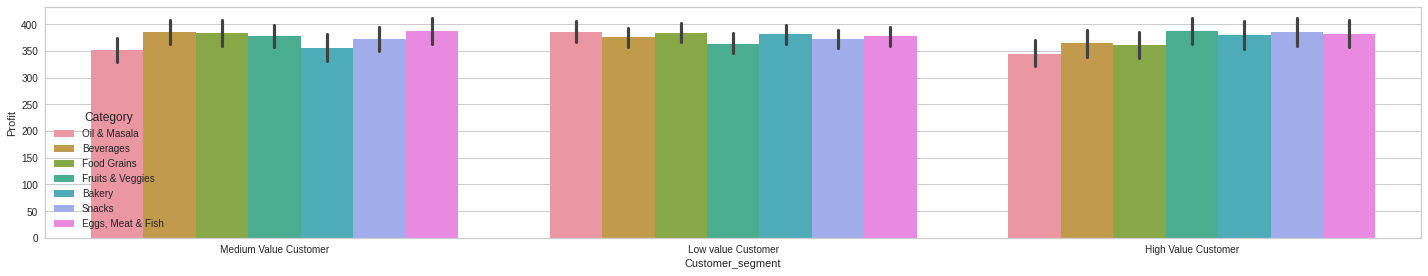

In [ ]:
plt.subplots(figsize=(20,4))
sns.barplot(data=df2,x="Customer_segment", y ="Profit" , hue = "Category")

plt.tight_layout()
plt.show()

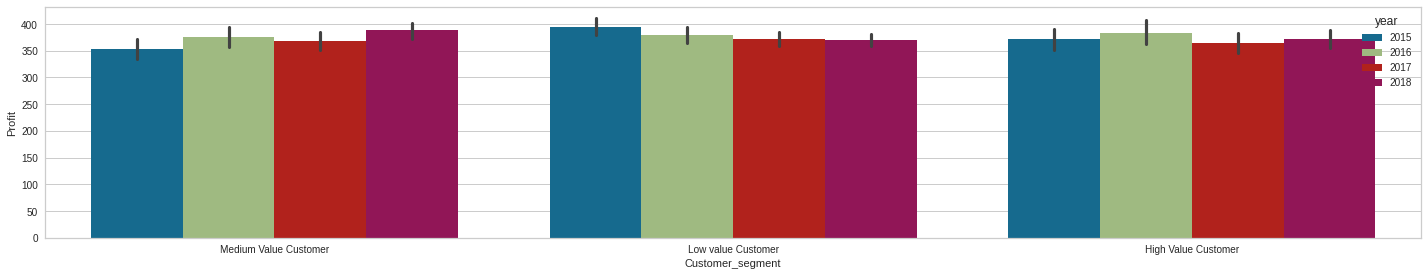

In [ ]:
plt.subplots(figsize=(20,4))
sns.barplot(data=df2,x="Customer_segment", y ="Profit" , hue = "year")

plt.tight_layout()
plt.show()